# Data visualization
A simple notebook to look at some of the samples compressed with different block sizes.  
Some notes:
1. We compressed the JPEG images with the standard 8x8 blocks grid using opencv, with no subsampling of the chrominance subspace;
2. We compressed all the remaining images with blocks of different sizes using a custom implementation (available in isplutils/jpeg_compression.py). Also in this case, we did not subsample the chrominance subspace.

Plese note that we saved the custom block JPEG images as PNG, i.e., an uncompressed format, to avoid introducing other artifacts due to other compression schemes. For this reason, the images might appear a little heavier in terms of storage with respect to standard JPEG.

## Libraries import

In [1]:
import pandas as pd
import glob, os
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Load the dataset Dataframe

In [2]:
all_dfs = pd.read_pickle('data_df.pkl')
all_dfs

jpeg_image_path  height  width
JPEG block size path                                                          
9               ucid.v2/ucid00014.tif   jpeg_bs_9/ucid00014.png     384    512
                ucid.v2/ucid00016.tif   jpeg_bs_9/ucid00016.png     512    384
                ucid.v2/ucid00051.tif   jpeg_bs_9/ucid00051.png     384    512
                ucid.v2/ucid00061.tif   jpeg_bs_9/ucid00061.png     384    512
                ucid.v2/ucid00108.tif   jpeg_bs_9/ucid00108.png     384    512
...                                                         ...     ...    ...
8               ucid.v2/ucid01138.tif  jpeg_bs_8/ucid01138.jpeg     384    512
                ucid.v2/ucid00729.tif  jpeg_bs_8/ucid00729.jpeg     384    512
                ucid.v2/ucid00947.tif  jpeg_bs_8/ucid00947.jpeg     384    512
                ucid.v2/ucid01303.tif  jpeg_bs_8/ucid01303.jpeg     384    512
                ucid.v2/ucid01333.tif  jpeg_bs_8/ucid01333.jpeg     384    512

[5352 rows x 3 columns]

## Let's open some samples from each compressed dataset

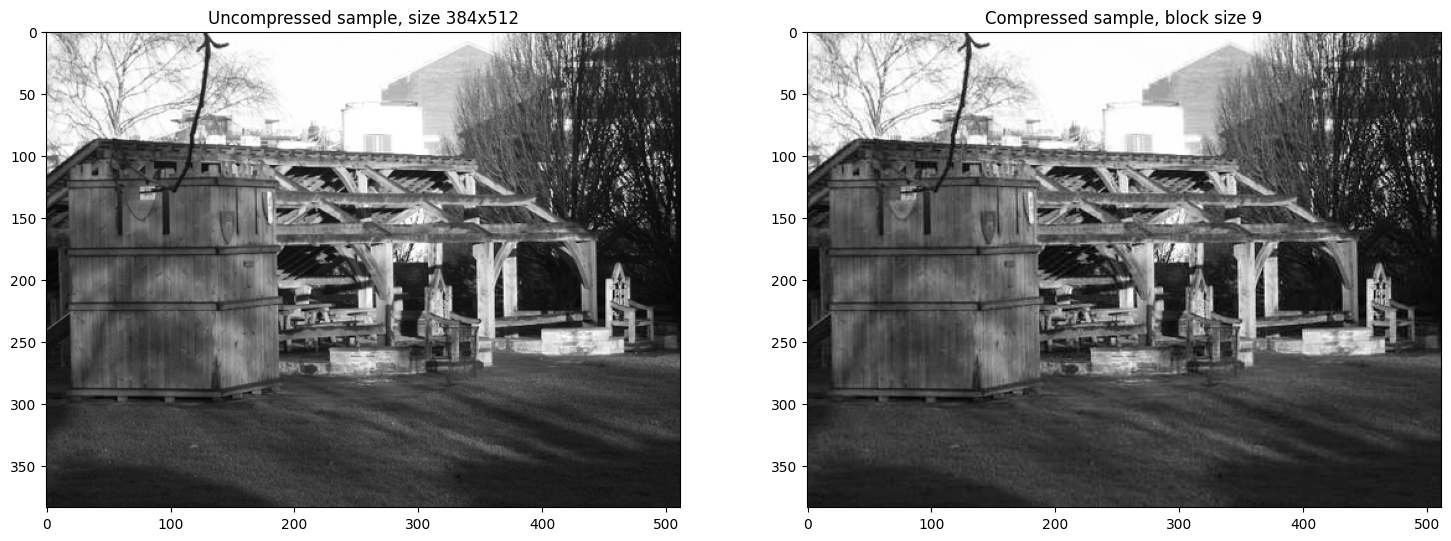

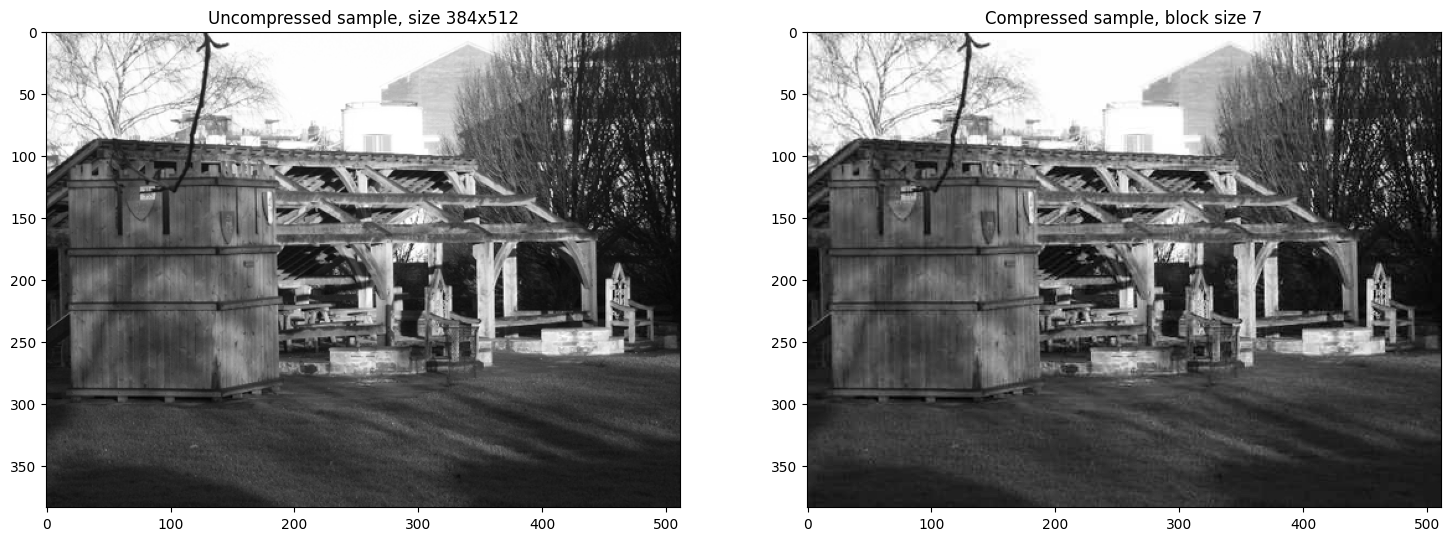

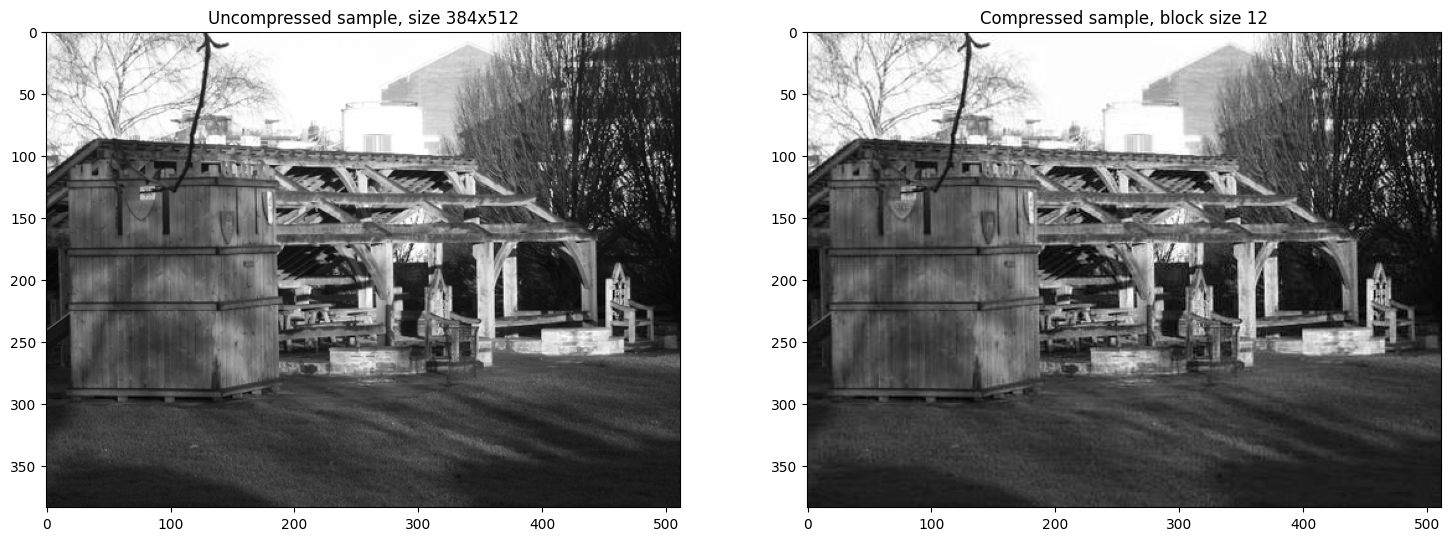

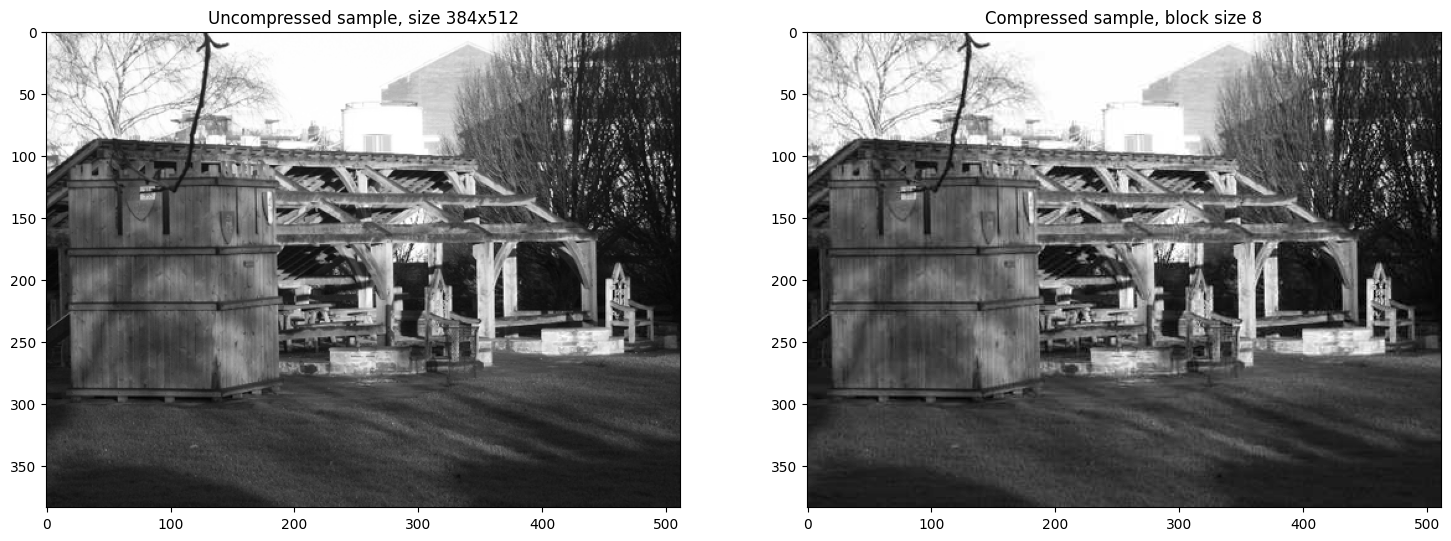

In [3]:
for jpeg_bs in all_dfs.index.get_level_values(0).unique():
    # Sample the dataframe
    df = all_dfs.loc[jpeg_bs]
    df = df.sample(1, random_state=42)
    # Get image paths
    ucid_path = df.index[0]
    jpeg_path = df['jpeg_image_path'].item()
    # Load samples
    ucid_img = cv2.imread(ucid_path, cv2.IMREAD_GRAYSCALE)
    jpeg_img = cv2.imread(jpeg_path, cv2.IMREAD_GRAYSCALE)
    # Create figure
    fig, axs = plt.subplots(1, 2, figsize=(18, 9))
    axs[0].imshow(ucid_img, cmap='gray'), axs[0].set_title(f'Uncompressed sample, size {df["height"].item()}x{df["width"].item()}')
    axs[1].imshow(jpeg_img, cmap='gray'), axs[1].set_title(f'Compressed sample, block size {jpeg_bs}')
    plt.show()

## Let's look at some patches to see the different compression blocks

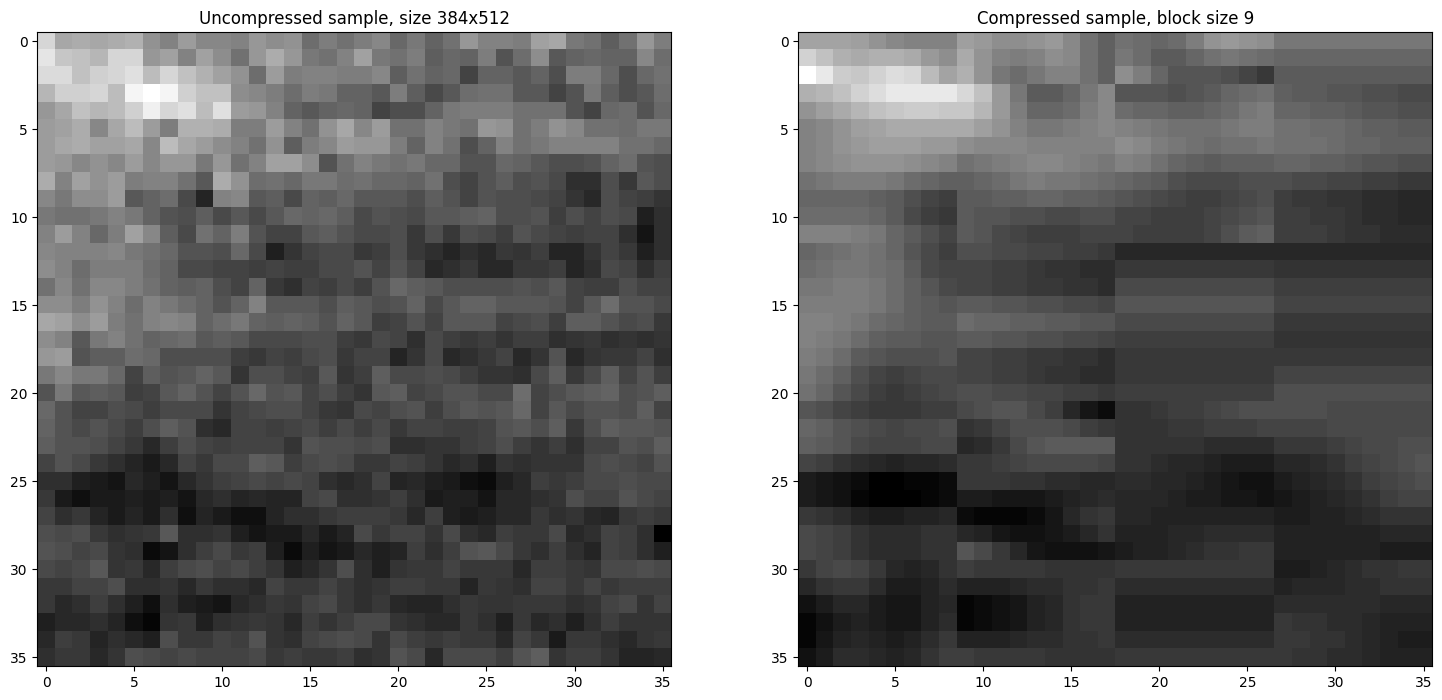

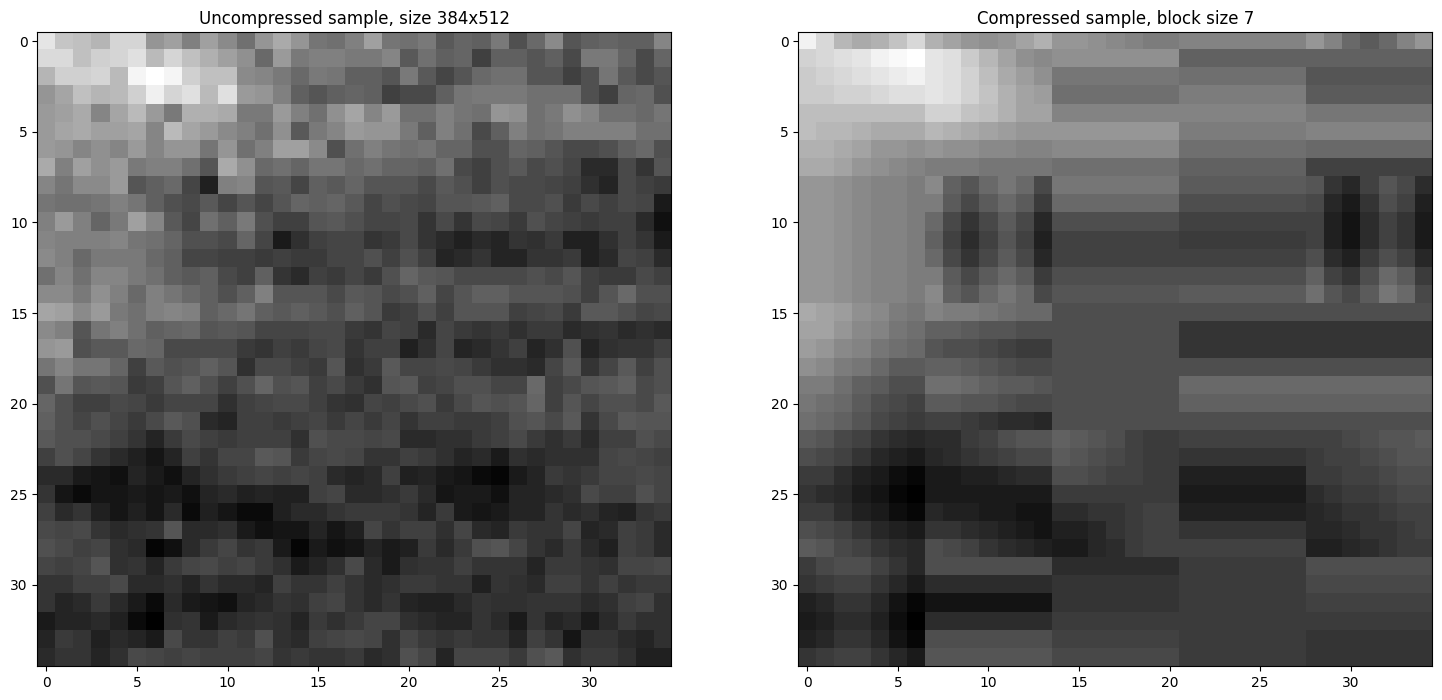

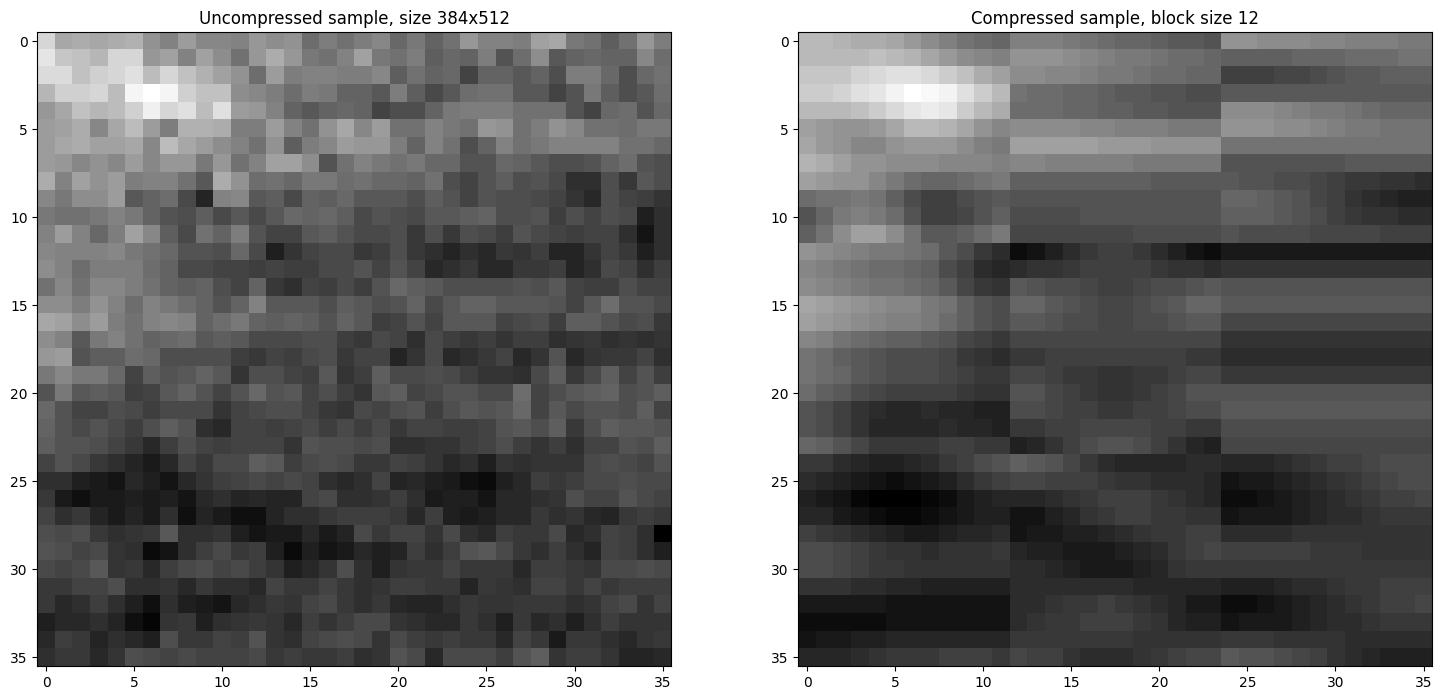

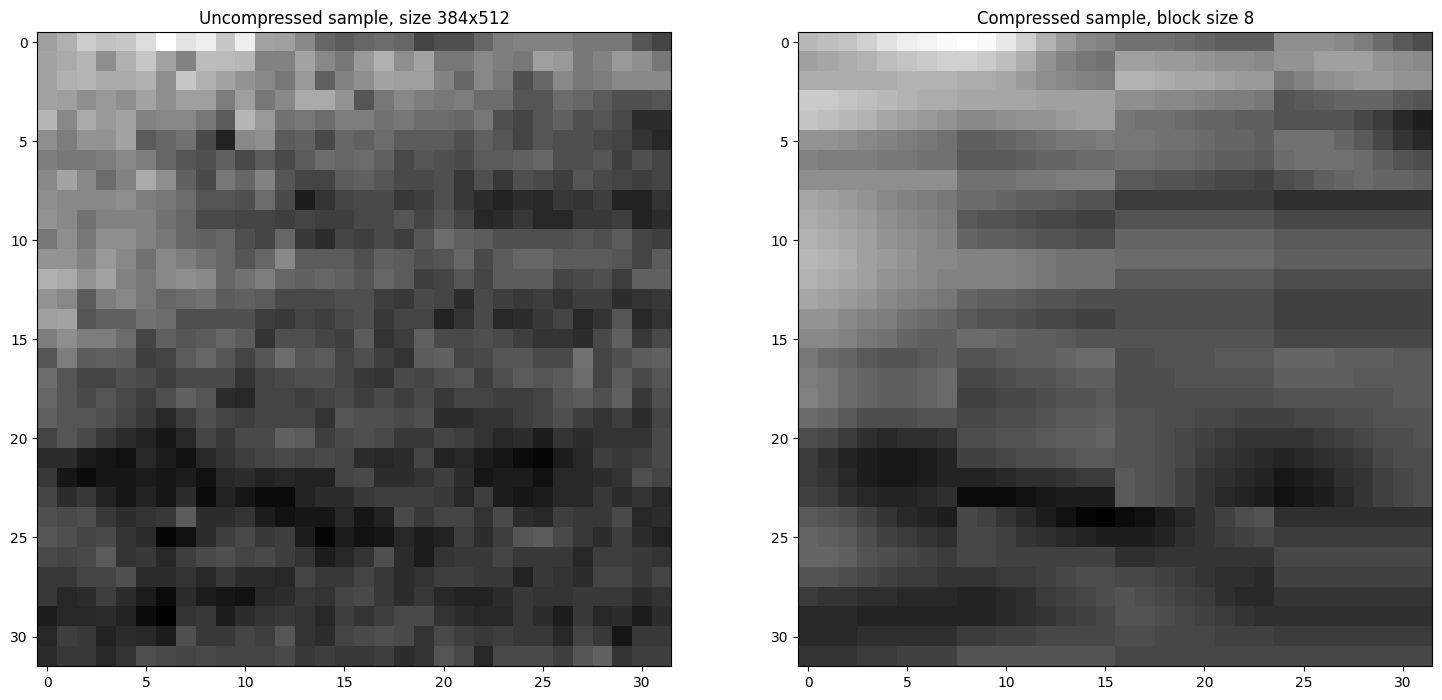

In [4]:
for jpeg_bs in all_dfs.index.get_level_values(0).unique():
    # Sample the dataframe
    df = all_dfs.loc[jpeg_bs]
    df = df.sample(1, random_state=42)
    # Get image paths
    ucid_path = df.index[0]
    jpeg_path = df['jpeg_image_path'].item()
    # Load samples
    ucid_img = cv2.imread(ucid_path, cv2.IMREAD_GRAYSCALE)
    jpeg_img = cv2.imread(jpeg_path, cv2.IMREAD_GRAYSCALE)
    # Create figure
    fig, axs = plt.subplots(1, 2, figsize=(18, 9))
    patch_size = jpeg_bs*round(32/jpeg_bs)
    axs[0].imshow(ucid_img[-patch_size:, :patch_size], cmap='gray'), axs[0].set_title(f'Uncompressed sample, size {df["height"].item()}x{df["width"].item()}')
    axs[1].imshow(jpeg_img[-patch_size:, :patch_size], cmap='gray'), axs[1].set_title(f'Compressed sample, block size {jpeg_bs}')
    plt.show()